In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics

1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

In [2]:
df = datasets.load_iris(as_frame=True)
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df = df.frame[df.target.isin([1, 2])] # оставим 2 класса
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

Будем строить логистическую регрессию на основе признаков "sepal length" и "petal length"

Text(0, 0.5, 'sepal length')

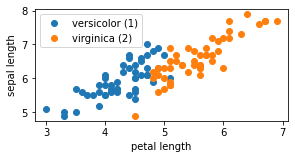

In [4]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(3, 2, 1)
plt.scatter(df.iloc[:, [2]][df.target == 1], df.iloc[:, [0]][df.target == 1], label='versicolor (1)')
plt.scatter(df.iloc[:, [2]][df.target == 2], df.iloc[:, [0]][df.target == 2], label='virginica (2)')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('sepal length')

In [5]:
df = df[ df.target != 0 ]
df = df.replace(1, 0).replace(2, 1) #заменим значения на 0 и 1 для построения модели логистической регрессии
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [6]:
Y = df.target.values 
X = df.iloc[:, [0, 2]].values 

In [75]:
class LogRegr:

    def __init__(self):
        self.metrics_dict = []

    def acc_prec(self, name, Y, Y_pr):
        acc = metrics.accuracy_score(Y, Y_pr)
        prec = metrics.precision_score(Y, Y_pr)
        return [name, acc, prec]

    def h(self, B, X):
        ''' значения, предсказанные моделью логистической регрессии '''
        h = []
        for j in range(X.shape[0]):
            L = B[0]
            for i in range(1, X.shape[1]+1):
                L += B[i] * X[j, i-1]
            h.append(1 / (1 + np.exp(-L)))
        return h

    def grad(self, y, B, X):
        ''' градиент '''
        s0 = 0
        for i in range(len(y)):
            s0 -= y[i] - self.h(B, X)[i]
        grad = [s0]

        for n in range(X.shape[1]):
            s = 0
            for i in range(len(y)):
                s -= X[i, n] * (y[i] - self.h(B, X)[i])
            grad.append(s)
        return grad


    def GradDesс(self, X, Y):
        ''' градиентный спуск '''
        B = np.zeros(np.shape(X)[1]+1)
        lr = 0.001
        for _ in range(100):
            dt = self.grad(Y, B, X)
            B[0] -= lr * dt[0]
            for i in range(X.shape[1]):
                B[i+1] -= lr * dt[i+1]

        Y_pr = [round(y_pr) for y_pr in self.h(B, X)]       
        self.metrics_dict.append(self.acc_prec("GradDesc", Y, Y_pr))
        return Y_pr


    def RMSProp(self, X, Y):
        B = np.zeros(np.shape(X)[1]+1)
        eps = 10**(-6) 
        gamma = 0.9
        lr = 0.05
        E = 0
        v = 0
        for _ in range(100):
            E = gamma * E + (1 - gamma) * np.array(self.grad(Y, B, X)) ** 2
            B = B - (lr / np.sqrt(E + eps)) * self.grad(Y, B, X) 

        Y_pr = [round(y_pr) for y_pr in self.h(B, X)]       
        self.metrics_dict.append(self.acc_prec('RMSProp', Y, Y_pr))
        return Y_pr

    def NesterovMomentum(self, X, Y):
        B = np.zeros(np.shape(X)[1]+1)
        gamma = 0.9
        lr = 0.01
        v0 = np.dot(lr, self.grad(Y, B, X))
        v1 = gamma * v0 + np.dot(lr, self.grad(Y, B - gamma*v0, X)) 
        for _ in range(100):
            v0 = v1
            v1 = gamma * v0 + np.dot(lr, self.grad(Y, B - gamma*v0, X)) 
            B = B - v1
        
        Y_pr = [round(y_pr) for y_pr in self.h(B, X)]       
        self.metrics_dict.append(self.acc_prec('NesterovMomentum', Y, Y_pr))
        return Y_pr
        

In [76]:
LR = LogRegr()

In [77]:
Y_pr_GradDesc = LR.GradDesс(X, Y)
Y_pr_RMSProp = LR.RMSProp(X, Y)
Y_pr_NesterovMomentum = LR.NesterovMomentum(X, Y)

In [82]:
pd.DataFrame(LR.metrics_dict, columns=['method', 'accuracy', 'precision_score'])

,method,accuracy,precision_score
0,GradDesc,0.90,0.844828
1,RMSProp,0.91,0.976744
2,NesterovMomentum,0.91,0.918367
